# Business Understanding
## Question
Bagaimana kita dapat menggunakan segmentasi customer untuk mengembangkan strategi retensi customer?

## Sub-question
1. Dimana kota yang memiliki persentase churn customer terbesar pada kurun waktu kuarter ketiga untuk diimplementasikan strategi retensi?
2. Apa segmentasi customer terbesar di kota tersebut pada kurun waktu kuarter ketiga?
3. Segmentasi customer apa yang memiliki persentase churn customer terbesar di kota tersebut pada kurun waktu kuarter ketiga sehingga dapat dijadikan target strategi retensi?
4. Apa yang mempengaruhi customer churn di segmentasi customer tersebut pada kurun waktu kuarter ketiga tersebut?
5. Jenis perangkat apa yang banyak digunakan oleh segmentasi customer pada kurun waktu kuarter ketiga tersebut?
6. Produk apa yang sering digunakan oleh segmentasi customer pada kurun waktu kuarter ketiga tersebut sehingga dapat dijadikan media untuk promosi kedepannya?


In [ ]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
def load_dataset(path:str)->pandas.DataFrame:
  data = pandas.read_excel(path)
  return data

In [ ]:
data = load_dataset("./resource/Telco_customer_churn_adapted_v2.xlsx")

# Data Undestanding

In [ ]:
data.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   7043 non-null   int64  
 1   Tenure Months                 7043 non-null   int64  
 2   Location                      7043 non-null   object 
 3   Device Class                  7043 non-null   object 
 4   Games Product                 7043 non-null   object 
 5   Music Product                 7043 non-null   object 
 6   Education Product             7043 non-null   object 
 7   Call Center                   7043 non-null   object 
 8   Video Product                 7043 non-null   object 
 9   Use MyApp                     7043 non-null   object 
 10  Payment Method                7043 non-null   object 
 11  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 12  Churn Label                   7043 non-null   object 
 13  Lon

In [ ]:
data.describe()

,Customer ID,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR)
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,32.371149,84.190200,107.043246,-6.404184,5720.384481
std,2033.283305,24.559481,39.117061,0.358316,0.322898,1537.974298
min,0.000000,0.000000,23.725000,106.816666,-6.914744,2603.900000
25%,1760.500000,9.000000,46.150000,106.816666,-6.914744,4509.700000
50%,3521.000000,29.000000,91.455000,106.816666,-6.200000,5885.100000
75%,5281.500000,55.000000,116.805000,107.609810,-6.200000,6994.650000
max,7042.000000,72.000000,154.375000,107.609810,-6.200000,8450.000000


In [ ]:
def create_bar_plot(data:pandas.DataFrame)->None:
  fig, ax = plt.subplots(figsize=(20, 15))
  sns.boxplot(data, ax=ax)
  plt.show()

In [ ]:
def create_pairplot(data:pandas.DataFrame)->None:
    sns.pairplot(data)

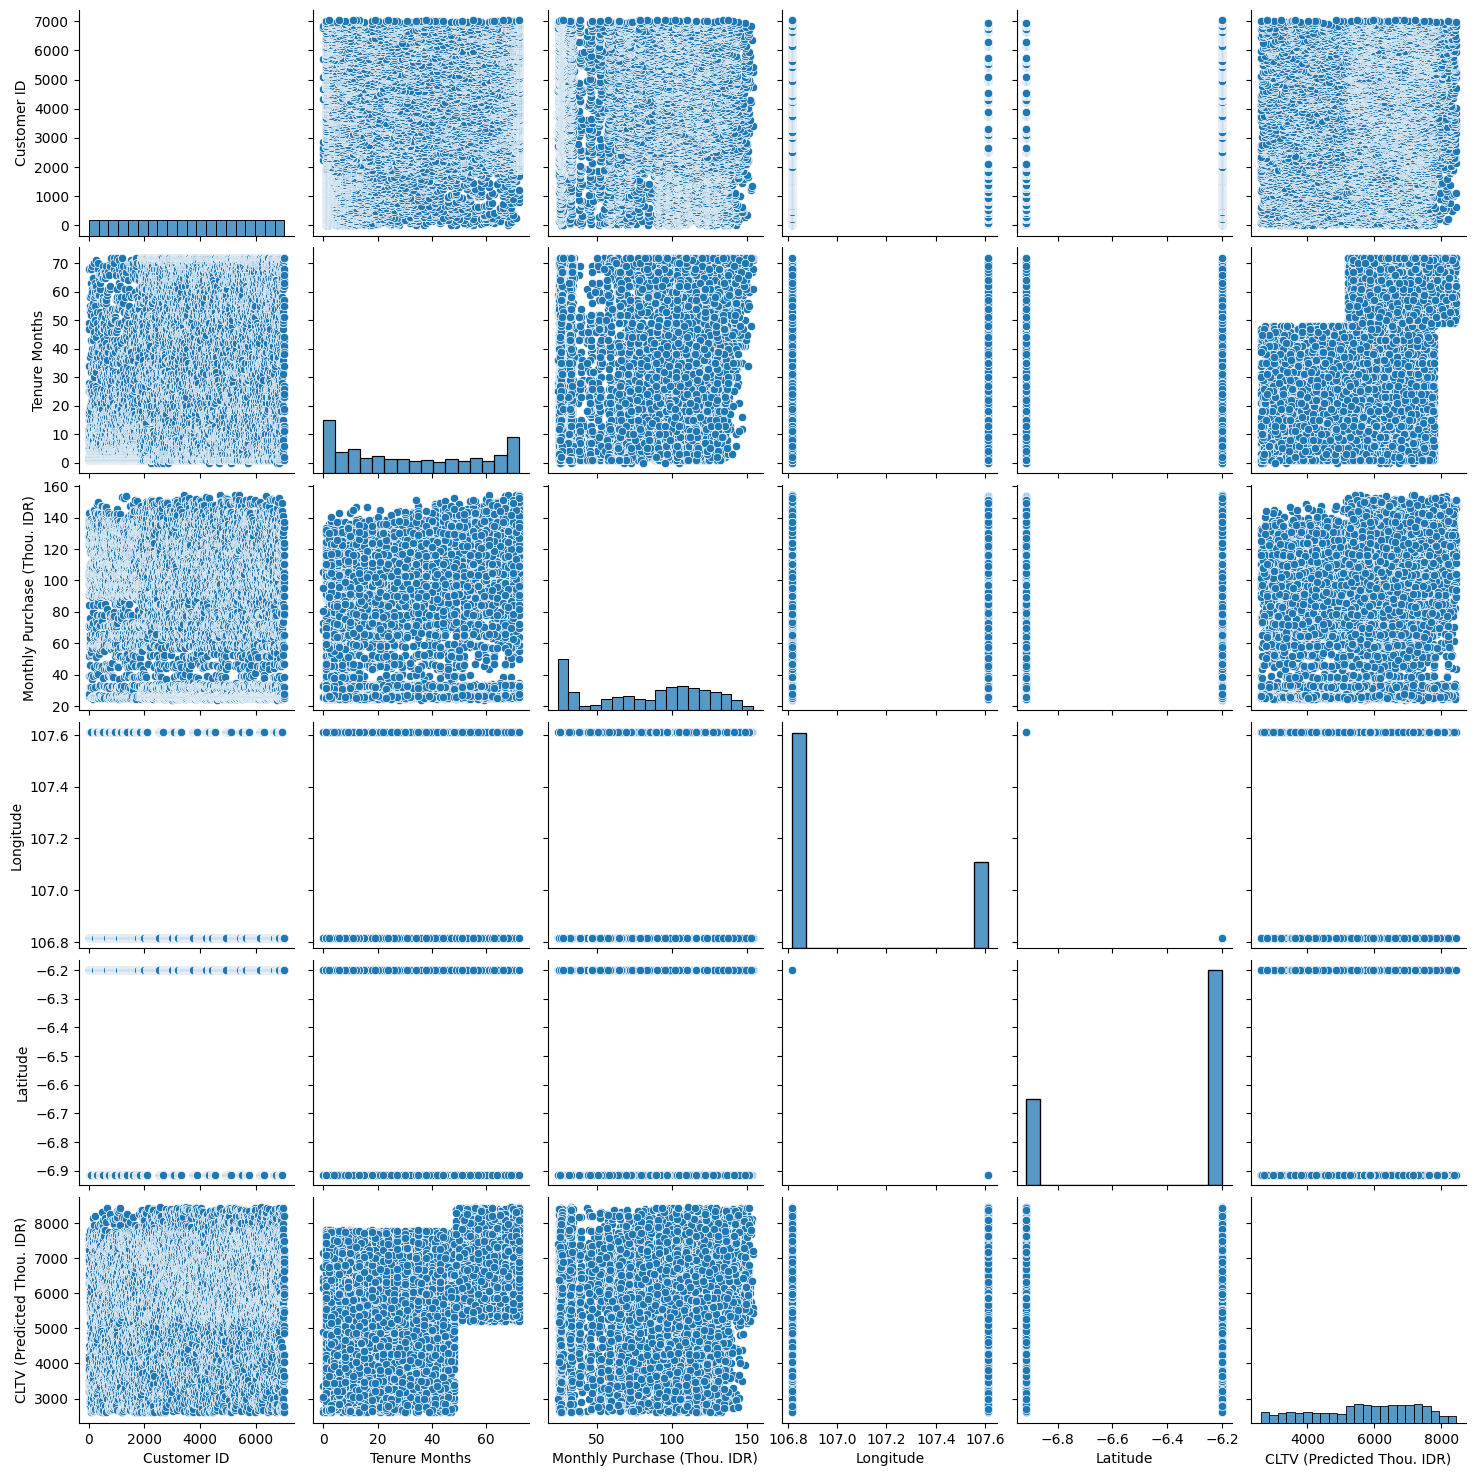

In [ ]:
create_pairplot(data)

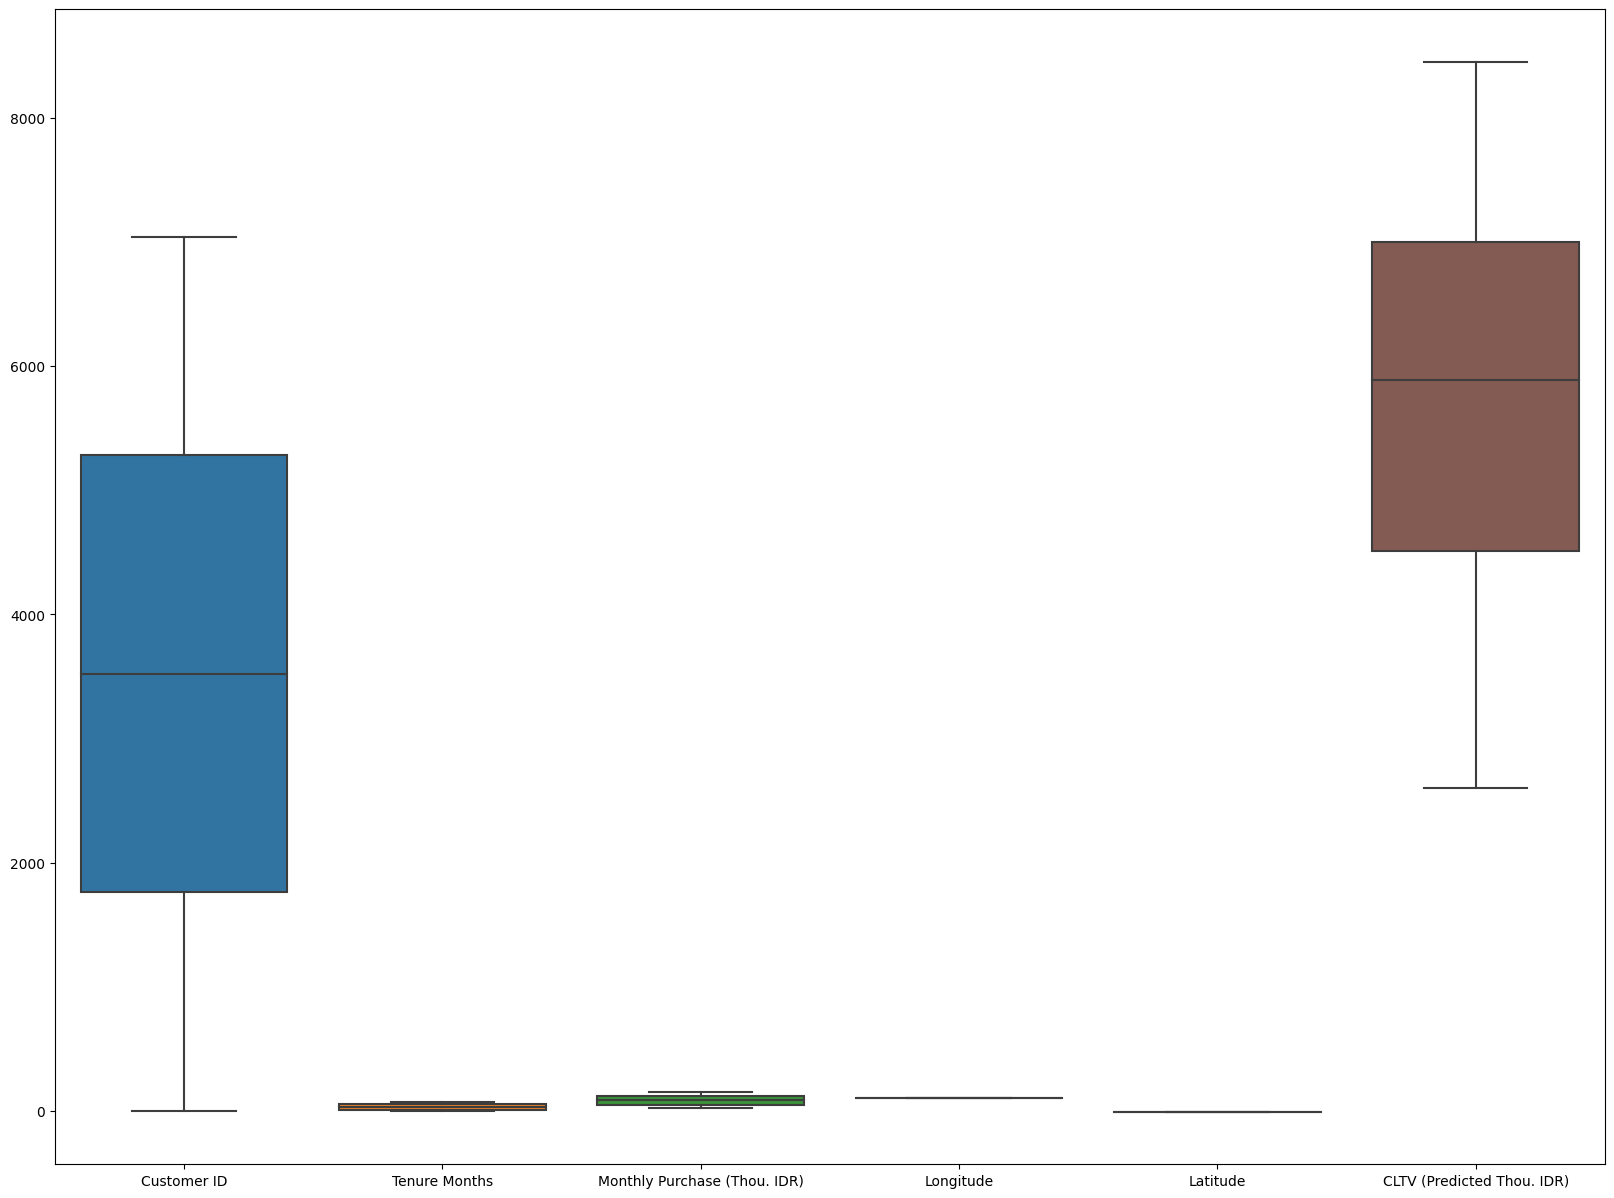

In [ ]:
create_bar_plot(data)

In [ ]:
def data_corr_heatmap(data:pandas.DataFrame)->None:
  sns.heatmap(data.corr(),annot=True)

<ipython-input-11-fbcf44b7b984>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


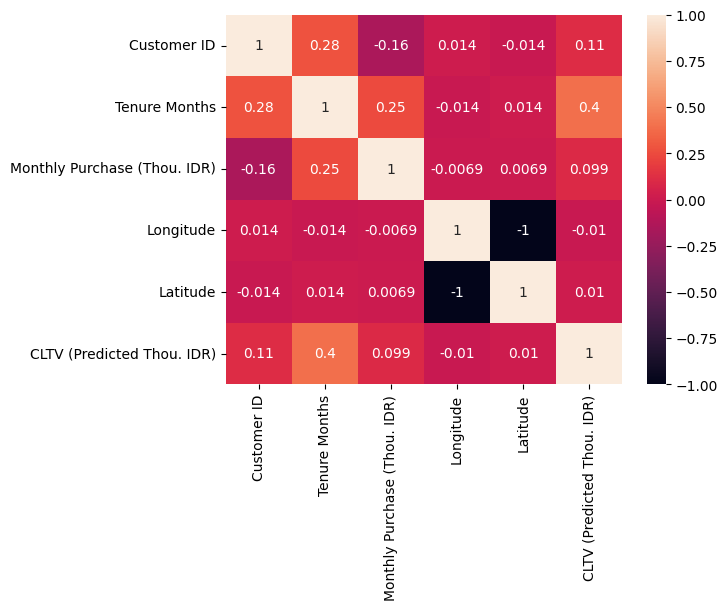

In [ ]:
data_corr_heatmap(data)

In [ ]:
def check_unique_values(data:pandas.DataFrame)->None:
  for i in data.columns[2:13]:
    if i=="Monthly Purchase (Thou. IDR)":
      pass
    else:
      print("Column name : {}\nUnique Values: {}\n".format(i,data[i].unique()))

In [ ]:
check_unique_values(data)

Column name : Location
Unique Values: ['Jakarta' 'Bandung']

Column name : Device Class
Unique Values: ['Mid End' 'High End' 'Low End']

Column name : Games Product
Unique Values: ['Yes' 'No' 'No internet service']

Column name : Music Product
Unique Values: ['Yes' 'No' 'No internet service']

Column name : Education Product
Unique Values: ['No' 'Yes' 'No internet service']

Column name : Call Center
Unique Values: ['No' 'Yes']

Column name : Video Product
Unique Values: ['No' 'Yes' 'No internet service']

Column name : Use MyApp
Unique Values: ['No' 'Yes' 'No internet service']

Column name : Payment Method
Unique Values: ['Digital Wallet' 'Pulsa' 'Debit' 'Credit']

Column name : Churn Label
Unique Values: ['Yes' 'No']



In [ ]:
def check_ratio(data:pandas.DataFrame)->None:
  for i in data.columns[2:13]:
    if i=="Monthly Purchase (Thou. IDR)":
      pass
    else:
      print("Column name : {}\nUnique Values:\n{}\n".format(i,data[i].value_counts()))

In [ ]:
check_ratio(data)

Column name : Location
Unique Values:
Jakarta    5031
Bandung    2012
Name: Location, dtype: int64

Column name : Device Class
Unique Values:
High End    3096
Mid End     2421
Low End     1526
Name: Device Class, dtype: int64

Column name : Games Product
Unique Values:
No                     3498
Yes                    2019
No internet service    1526
Name: Games Product, dtype: int64

Column name : Music Product
Unique Values:
No                     3088
Yes                    2429
No internet service    1526
Name: Music Product, dtype: int64

Column name : Education Product
Unique Values:
No                     3095
Yes                    2422
No internet service    1526
Name: Education Product, dtype: int64

Column name : Call Center
Unique Values:
No     4999
Yes    2044
Name: Call Center, dtype: int64

Column name : Video Product
Unique Values:
No                     2810
Yes                    2707
No internet service    1526
Name: Video Product, dtype: int64

Column name : Use M

In [ ]:
data_yes_churn_label = data[data["Churn Label"]=="Yes"]
data_yes_churn_label.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [ ]:
check_ratio(data_yes_churn_label)

Column name : Location
Unique Values:
Jakarta    1323
Bandung     546
Name: Location, dtype: int64

Column name : Device Class
Unique Values:
High End    1297
Mid End      459
Low End      113
Name: Device Class, dtype: int64

Column name : Games Product
Unique Values:
No                     1461
Yes                     295
No internet service     113
Name: Games Product, dtype: int64

Column name : Music Product
Unique Values:
No                     1233
Yes                     523
No internet service     113
Name: Music Product, dtype: int64

Column name : Education Product
Unique Values:
No                     1211
Yes                     545
No internet service     113
Name: Education Product, dtype: int64

Column name : Call Center
Unique Values:
No     1559
Yes     310
Name: Call Center, dtype: int64

Column name : Video Product
Unique Values:
No                     942
Yes                    814
No internet service    113
Name: Video Product, dtype: int64

Column name : Use MyAp

# Data Preparation

In [ ]:
data.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')

In [ ]:
rfm_data = data.copy()

In [ ]:
rfm_data.drop(["Location","Device Class",
                  "Games Product","Music Product",
                  "Education Product", "Call Center","Video Product",
                  "Use MyApp","Payment Method","Churn Label","Longitude",
                  "Latitude","CLTV (Predicted Thou. IDR)"],axis=1,inplace=True)

In [ ]:
def create_month_arr(data:pandas.DataFrame,number:int):
  arr=[]
  for i in range(0,len(data)):
    arr.append(number)
  return arr

In [ ]:
rfm_data["Last Payment"]=create_month_arr(rfm_data,1)

# Modelling

## RFM

In [ ]:
rfm_data.head()

,Customer ID,Tenure Months,Monthly Purchase (Thou. IDR),Last Payment
0,0,2,70.005,1
1,1,2,91.910,1
2,2,8,129.545,1
3,3,28,136.240,1
4,4,49,134.810,1


In [ ]:
rfm_table = pandas.DataFrame(columns=["Customer ID", "Recency", "Frequency", "Monetary"])

In [ ]:
rfm_table["Customer ID"] = rfm_data["Customer ID"]
rfm_table["Recency"] = rfm_data["Last Payment"]
rfm_table["Frequency"] = rfm_data["Tenure Months"]
rfm_table["Monetary"] = rfm_data["Monthly Purchase (Thou. IDR)"]

In [ ]:
rfm_table

,Customer ID,Recency,Frequency,Monetary
0,0,1,2,70.005
1,1,1,2,91.910
2,2,1,8,129.545
3,3,1,28,136.240
4,4,1,49,134.810
...,...,...,...,...
7038,7038,1,72,27.495
7039,7039,1,24,110.240
7040,7040,1,72,134.160
7041,7041,1,11,38.480


In [ ]:
rfm_table['R_rank'] = rfm_table['Recency'].rank(ascending=False)
rfm_table['F_rank'] = rfm_table['Frequency'].rank(ascending=True)
rfm_table['M_rank'] = rfm_table['Monetary'].rank(ascending=True)

rfm_table['R_rank_norm'] = (rfm_table['R_rank']/rfm_table['R_rank'].max())*100
rfm_table['F_rank_norm'] = (rfm_table['F_rank']/rfm_table['F_rank'].max())*100
rfm_table['M_rank_norm'] = (rfm_table['F_rank']/rfm_table['M_rank'].max())*100

rfm_table.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_table.head()

,Customer ID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,0,1,2,70.005,100.0,10.834244,10.556581
1,1,1,2,91.910,100.0,10.834244,10.556581
2,2,1,8,129.545,100.0,24.393443,23.768281
3,3,1,28,136.240,100.0,50.550091,49.254579
4,4,1,49,134.810,100.0,70.491803,68.685219


In [ ]:
kmeans_rfm_table = rfm_table[rfm_table.columns[1:4]]
kmeans_rfm_table

,Recency,Frequency,Monetary
0,1,2,70.005
1,1,2,91.910
2,1,8,129.545
3,1,28,136.240
4,1,49,134.810
...,...,...,...
7038,1,72,27.495
7039,1,24,110.240
7040,1,72,134.160
7041,1,11,38.480


In [ ]:
rfm_table.describe()

,Customer ID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
count,7043.000000,7043.0,7043.000000,7043.000000,7043.0,7043.000000,7043.000000
mean,3521.000000,1.0,32.371149,84.190200,100.0,51.322404,50.007099
std,2033.283305,0.0,24.559481,39.117061,0.0,29.614057,28.855099
min,0.000000,1.0,0.000000,23.725000,100.0,0.087432,0.085191
25%,1760.500000,1.0,9.000000,46.150000,100.0,26.156648,25.486298
50%,3521.000000,1.0,29.000000,91.455000,100.0,51.489982,50.170382
75%,5281.500000,1.0,55.000000,116.805000,100.0,76.597450,74.634389
max,7042.000000,1.0,72.000000,154.375000,100.0,100.000000,97.437172


In [ ]:
from typing import List

def create_main_rfm_table(data:pandas.DataFrame,columns:List):
  arr=[]
  for column in columns:
    arr.append(round(data[column].mean(),2))
  data = pandas.DataFrame(columns=columns)
  data.loc[len(data)] = arr
  return data

In [ ]:
col = ["Last Payment","Tenure Months","Monthly Purchase (Thou. IDR)"]
main_rfm_table = create_main_rfm_table(rfm_data,col)

In [ ]:
main_rfm_table.head()

,Last Payment,Tenure Months,Monthly Purchase (Thou. IDR)
0,1.0,32.37,84.19


## K Means Clustering

In [ ]:
! pip install kneed

In [ ]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as ss
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [ ]:
scaler = StandardScaler()
kmeans_rfm_table_norm = kmeans_rfm_table

In [ ]:
kmeans_rfm_table_norm = scaler.fit_transform(kmeans_rfm_table_norm)
kmeans_rfm_table_norm = pandas.DataFrame(kmeans_rfm_table_norm)
kmeans_rfm_table_norm

,0,1,2
0,0.0,-1.236724,-0.362660
1,0.0,-1.236724,0.197365
2,0.0,-0.992402,1.159546
3,0.0,-0.177995,1.330711
4,0.0,0.677133,1.294151
...,...,...,...
7038,0.0,1.613701,-1.449476
7039,0.0,-0.340876,0.665992
7040,0.0,1.613701,1.277533
7041,0.0,-0.870241,-1.168632


In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=300)
kmeans.fit(kmeans_rfm_table_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
kmeans.inertia_

4622.54497828061

In [ ]:
kmeans.cluster_centers_

array([[ 0.        , -0.80587851,  0.34057303],
       [ 0.        ,  1.04245577,  0.80483837],
       [ 0.        , -0.1250241 , -1.27213457]])

In [ ]:
kmeans.n_iter_

15

In [ ]:
kmeans.labels_[:5]

array([0, 0, 0, 0, 1], dtype=int32)

## Elbow Method

In [ ]:
kmeans_k = {
    "max_iter":300,
    "random_state":42
}

sse = []
for i in range(1,16):
  kmeans = KMeans(n_clusters=i, **kmeans_k)
  kmeans.fit(kmeans_rfm_table_norm)
  sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

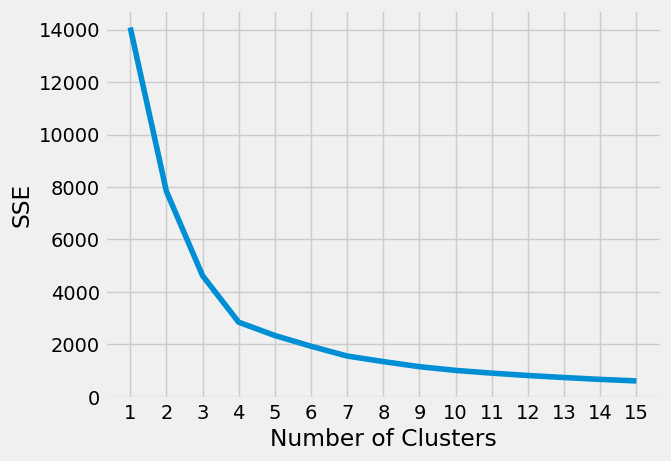

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 16), sse)
plt.xticks(range(1, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
knee_locator = KneeLocator(
    range(1,16),sse,curve="convex",direction="decreasing"
)
knee_locator.elbow

4

In [ ]:
kmeans = KMeans(n_clusters=4,max_iter=300)
kmeans.fit(kmeans_rfm_table_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
kmeans_rfm_table_norm.columns = ["Recency", "Frequency", "Monetary"]
kmeans_rfm_table_norm.loc[:,"Customer ID"] = rfm_table["Customer ID"]
kmeans_rfm_table_norm.head()

,Recency,Frequency,Monetary,Customer ID
0,0.0,-1.236724,-0.362660,0
1,0.0,-1.236724,0.197365,1
2,0.0,-0.992402,1.159546,2
3,0.0,-0.177995,1.330711,3
4,0.0,0.677133,1.294151,4


In [ ]:
kmeans_rfm_table_norm['cluster']=kmeans.labels_
kmeans_rfm_table_norm

,Recency,Frequency,Monetary,Customer ID,cluster
0,0.0,-1.236724,-0.362660,0,1
1,0.0,-1.236724,0.197365,1,3
2,0.0,-0.992402,1.159546,2,3
3,0.0,-0.177995,1.330711,3,3
4,0.0,0.677133,1.294151,4,0
...,...,...,...,...,...
7038,0.0,1.613701,-1.449476,7038,2
7039,0.0,-0.340876,0.665992,7039,3
7040,0.0,1.613701,1.277533,7040,0
7041,0.0,-0.870241,-1.168632,7041,1


<Axes: xlabel='cluster', ylabel='Monetary'>

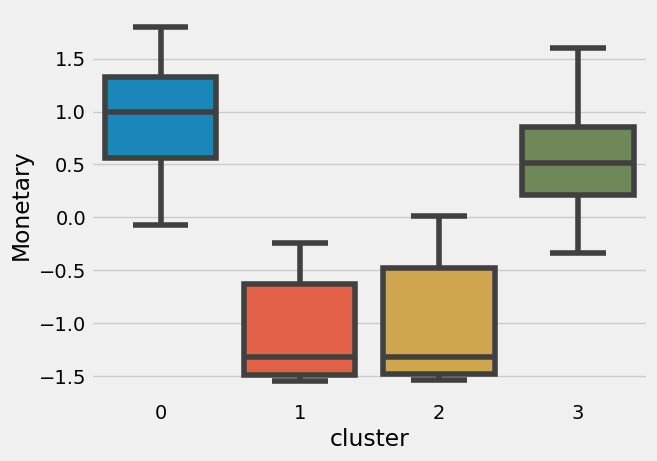

In [ ]:
sns.boxplot(x="cluster",y="Monetary",data=kmeans_rfm_table_norm)

<Axes: xlabel='cluster', ylabel='Frequency'>

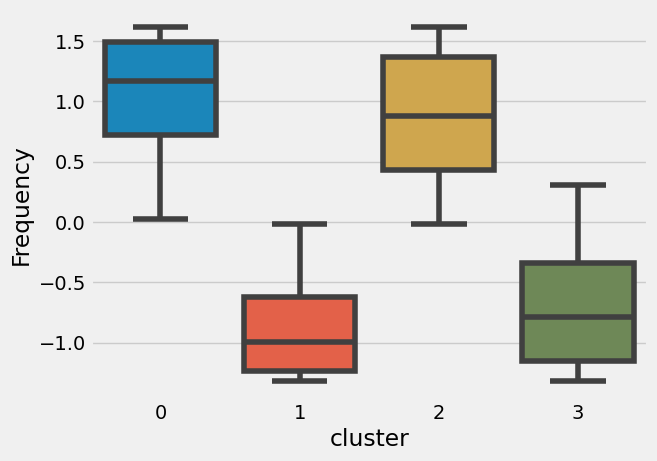

In [ ]:
sns.boxplot(x="cluster",y="Frequency",data=kmeans_rfm_table_norm)

<Axes: xlabel='cluster', ylabel='Recency'>

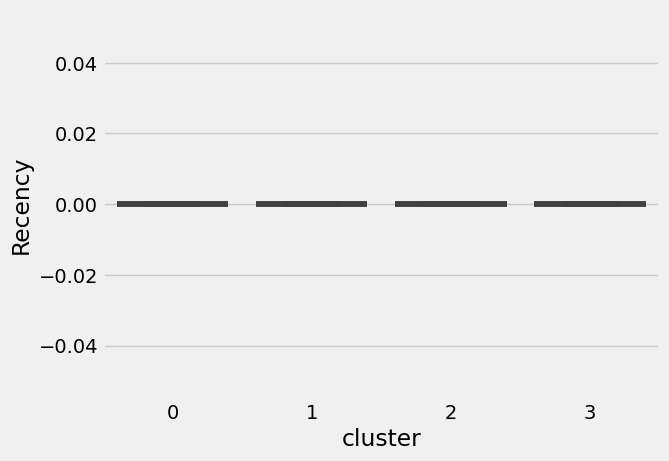

In [ ]:
sns.boxplot(x="cluster",y="Recency",data=kmeans_rfm_table_norm)

In [ ]:
def visualize_kmeans(frequency, monetary, cluster_labels,centroids):

    # Create a scatter plot
    plt.figure(figsize=(10, 7))
    plt.scatter(frequency, monetary, c=cluster_labels, s=50)

    # Add labels and title
    plt.xlabel('Frequency')
    plt.ylabel('Monetary')
    plt.title('K-Means Clustering (4 Attributes)')

    # Add centroids to the plot
    for i in range(len(centroids)):
        centroid = centroids[i]
        plt.plot(centroid[1], centroid[2], marker='o', markersize=10, markerfacecolor='black')

        # Add a label to each centroid
        label = 'Centroid {}'.format(i + 1)
        plt.annotate(label, (centroid[1] + 0.1, centroid[2] + 0.1), fontsize=12)

    # Show the plot
    plt.show()

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.        ,  1.07368208,  0.93896235],
       [ 0.        , -0.89109485, -1.07322153],
       [ 0.        ,  0.88542371, -1.02143841],
       [ 0.        , -0.71547399,  0.54688497]])

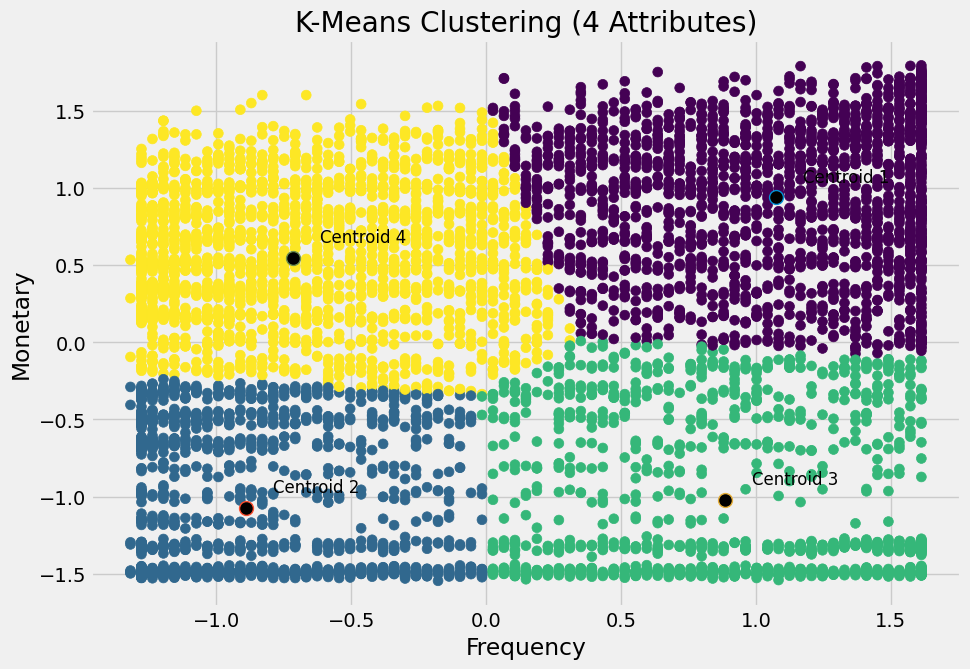

In [ ]:
visualize_kmeans(kmeans_rfm_table_norm["Frequency"], kmeans_rfm_table_norm["Monetary"], kmeans_rfm_table_norm["cluster"],centroids)

In [ ]:
kmeans_rfm_table["cluster"]=kmeans_rfm_table_norm["cluster"]

<ipython-input-55-2fa6a5ebd918>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeans_rfm_table["cluster"]=kmeans_rfm_table_norm["cluster"]


In [ ]:
kmeans_rfm_table

,Recency,Frequency,Monetary,cluster
0,1,2,70.005,1
1,1,2,91.910,3
2,1,8,129.545,3
3,1,28,136.240,3
4,1,49,134.810,0
...,...,...,...,...
7038,1,72,27.495,2
7039,1,24,110.240,3
7040,1,72,134.160,0
7041,1,11,38.480,1


In [ ]:
mean_kmeans = kmeans_rfm_table.groupby("cluster").mean()
mean_kmeans

,Recency,Frequency,Monetary
cluster,,,
0,1.0,58.738351,120.917040
1,1.0,10.487875,42.211908
2,1.0,54.115152,44.237368
3,1.0,14.800726,105.581214


In [ ]:
main_rfm_table.head()

,Last Payment,Tenure Months,Monthly Purchase (Thou. IDR)
0,1.0,32.37,84.19


In [ ]:
classes = ["Konsumen Jangka Pendek dengan Tingkat Konsumsi Rendah",
           "Konsumen Jangka Panjang dengan Tingkat Konsumsi Tinggi",
           "Konsumen Jangka Panjang dengan Tingkat Konsumsi Rendah",
           "Konsumen Jangka Pendek dengan Tingkat Konsumsi Tinggi"]
mean_kmeans["Kelas"]=classes

In [ ]:
persentase = []
persentase_cluster_0 = (kmeans_rfm_table[kmeans_rfm_table["cluster"]==0].shape[0]/kmeans_rfm_table.shape[0])*100
persentase_cluster_1 = (kmeans_rfm_table[kmeans_rfm_table["cluster"]==1].shape[0]/kmeans_rfm_table.shape[0])*100
persentase_cluster_2 = (kmeans_rfm_table[kmeans_rfm_table["cluster"]==2].shape[0]/kmeans_rfm_table.shape[0])*100
persentase_cluster_3 = (kmeans_rfm_table[kmeans_rfm_table["cluster"]==3].shape[0]/kmeans_rfm_table.shape[0])*100

persentase.append(persentase_cluster_0)
persentase.append(persentase_cluster_1)
persentase.append(persentase_cluster_2)
persentase.append(persentase_cluster_3)

print(persentase_cluster_0)
print(persentase_cluster_1)
print(persentase_cluster_2)
print(persentase_cluster_3)
print(persentase_cluster_0+persentase_cluster_1+persentase_cluster_2+persentase_cluster_3)

27.729660655970466
24.59179326991339
16.399261678262103
31.27928439585404
100.0


In [ ]:
mean_kmeans["Persentase"]=persentase

In [ ]:
mean_kmeans

,Recency,Frequency,Monetary,Kelas,Persentase
cluster,,,,,
0,1.0,58.738351,120.917040,Konsumen Jangka Pendek dengan Tingkat Konsumsi...,27.729661
1,1.0,10.487875,42.211908,Konsumen Jangka Panjang dengan Tingkat Konsums...,24.591793
2,1.0,54.115152,44.237368,Konsumen Jangka Panjang dengan Tingkat Konsums...,16.399262
3,1.0,14.800726,105.581214,Konsumen Jangka Pendek dengan Tingkat Konsumsi...,31.279284


# Jawaban

In [ ]:
final_data = data.copy()

In [ ]:
final_data["cluster"] = kmeans_rfm_table_norm["cluster"]

In [ ]:
labels={
        1:"Short-term Customers with Low Consumption Levels",
        0:"Long-term Customers with High Consumption Levels",
        2:"Long-term Customers with Low Consumption Levels",
        3:"Short-term Customers with High Consumption Levels"
}
final_data["cluster"] = final_data["cluster"].map(labels)

In [ ]:
final_data

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),cluster
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7,Short-term Customers with Low Consumption Levels
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3,Short-term Customers with High Consumption Levels
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6,Short-term Customers with High Consumption Levels
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9,Short-term Customers with High Consumption Levels
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0,Long-term Customers with High Consumption Levels
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.816666,-6.2,6897.8,Long-term Customers with Low Consumption Levels
7039,7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.816666,-6.2,2782.0,Short-term Customers with High Consumption Levels
7040,7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.816666,-6.2,7228.0,Long-term Customers with High Consumption Levels
7041,7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.816666,-6.2,3630.9,Short-term Customers with Low Consumption Levels


## 1. Dimana kota yang memiliki persentase churn customer terbesar pada kurun waktu kuarter ketiga untuk diimplementasikan strategi retensi?

In [ ]:
final_data.groupby("Location")["Churn Label"].value_counts()

Location  Churn Label
Bandung   No             1466
          Yes             546
Jakarta   No             3708
          Yes            1323
Name: Churn Label, dtype: int64

In [ ]:
kota = ["Bandung", "Jakarta"]
persentase_churn = [round(546/(546+1466)*100,2)
                    ,round(1323/(3708+1323)*100,2)]
churn_count = pandas.DataFrame()
churn_count["Kota"]=kota
churn_count["Jumlah Churn"]=persentase_churn
churn_count

,Kota,Jumlah Churn
0,Bandung,27.14
1,Jakarta,26.30


In [ ]:
import plotly.express as px

fig = px.bar(churn_count,x="Kota",
             y="Jumlah Churn",
             text="Jumlah Churn",
             title = "Comparison Graph of the Overall Churn Percentage for the Combined Cities of Bandung and Jakarta During the Third Quarter",
             color="Jumlah Churn",
             labels={"Jumlah Churn":"Churn Percentage (%)",
                     "Kota":"City"})
fig.update_traces(textposition='outside',
                 marker_color=["#b2172c","#b3b3b3"])

fig.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/numeric.py:2463: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [ ]:
nama_pers = ["Ya","Tidak"]

In [ ]:
fig = px.pie(values=final_data[final_data["Location"]=="Bandung"]["Churn Label"].value_counts(normalize=True).mul(100).round(1).values,
             names=final_data[final_data["Location"]=="Bandung"]["Churn Label"].value_counts(normalize=True).mul(100).round(1).index,
             color=nama_pers,
             hole=0.5,
             color_discrete_map={
                "Tidak":"#b2172c",
                "Ya":"#b3b3b3"
             },
             title = "Graph of Customer Churn Percentage in the City of Bandung During the Third Quarter")

fig.show()

## 2. Apa segmentasi customer terbesar di kota tersebut pada kurun waktu kuarter ketiga?

In [ ]:
final_data_bandung = final_data[final_data["Location"]=="Bandung"]

In [ ]:
final_data_bandung["cluster"].value_counts().index

Index(['Short-term Customers with High Consumption Levels',
       'Long-term Customers with High Consumption Levels',
       'Short-term Customers with Low Consumption Levels',
       'Long-term Customers with Low Consumption Levels'],
      dtype='object')

In [ ]:
final_data_bandung["cluster"].value_counts().values

array([637, 533, 512, 330])

In [ ]:
fig = px.pie(values=final_data_bandung["cluster"].value_counts().values,
             names=final_data_bandung["cluster"].value_counts().index,
             color=final_data_bandung["cluster"].value_counts().index,
             hole=0.5,
             color_discrete_map={
                "Long-term Customers with Low Consumption Levels":"#b3b3b3",
                "Long-term Customers with High Consumption Levels":"#bb5956",
                "Short-term Customers with Low Consumption Levels":"#bc8783",
                "Short-term Customers with High Consumption Levels":"#b2172c"
             },
             title="Customer Segmentation Graph in the City of Bandung During the Third Quarter")

fig.show()

In [ ]:
final_data_bandung["Tenure Months"].mean()

31.81013916500994

## 3. Segmentasi customer apa yang memiliki persentase churn customer terbesar di kota tersebut pada kurun waktu kuarter ketiga sehingga dapat dijadikan target strategi retensi?

In [ ]:
cluster_churn = final_data_bandung.groupby("cluster")["Churn Label"].value_counts(normalize=True).mul(100).to_frame()
cluster_churn = cluster_churn.add_suffix('_count').reset_index()
cluster_churn

,cluster,Churn Label,Churn Label_count
0,Long-term Customers with High Consumption Levels,No,83.489681
1,Long-term Customers with High Consumption Levels,Yes,16.510319
2,Long-term Customers with Low Consumption Levels,No,93.939394
3,Long-term Customers with Low Consumption Levels,Yes,6.060606
4,Short-term Customers with High Consumption Levels,Yes,50.235479
5,Short-term Customers with High Consumption Levels,No,49.764521
6,Short-term Customers with Low Consumption Levels,No,76.953125
7,Short-term Customers with Low Consumption Levels,Yes,23.046875


In [ ]:
cluster_churn_yes = cluster_churn[cluster_churn["Churn Label"]=="Yes"]
cluster_churn_yes = cluster_churn_yes.sort_values(by=['Churn Label_count'],ascending=False)
cluster_churn_yes

,cluster,Churn Label,Churn Label_count
4,Short-term Customers with High Consumption Levels,Yes,50.235479
7,Short-term Customers with Low Consumption Levels,Yes,23.046875
1,Long-term Customers with High Consumption Levels,Yes,16.510319
3,Long-term Customers with Low Consumption Levels,Yes,6.060606


In [ ]:
fig = px.bar(cluster_churn_yes,
             x=cluster_churn_yes["cluster"],
             y=cluster_churn_yes["Churn Label_count"],
             color=cluster_churn_yes["Churn Label_count"],
             text=cluster_churn_yes["Churn Label_count"].round(1),
             title="Graph of Customer Segmentation with the Highest Churn Percentage in the City of Bandung During the Third Quarter",
             labels={
                "Churn Label_count":"Churn Percentage (%)",
                "cluster":"Customer Segment"
             }
             )
fig.update_traces(textposition='outside',
                  marker_color=["#b2172c","#b94c4b","#bc716c","#b3b3b3"])
fig.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/numeric.py:2463: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



## 3. Apa yang mempengaruhi customer churn di segmentasi customer tersebut pada kurun waktu kuarter ketiga tersebut?

In [ ]:
final_data_bandung_cluster_3 = final_data_bandung[(final_data_bandung["cluster"]=="Short-term Customers with High Consumption Levels")]
final_data_bandung_cluster_3

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),cluster
37,37,20,Bandung,High End,Yes,No,No,No,No,No,Pulsa,107.120,Yes,107.60981,-6.914744,7434.7,Short-term Customers with High Consumption Levels
38,38,4,Bandung,High End,No,No,No,No,No,No,Debit,92.170,Yes,107.60981,-6.914744,5573.1,Short-term Customers with High Consumption Levels
40,40,2,Bandung,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,135.720,Yes,107.60981,-6.914744,6097.0,Short-term Customers with High Consumption Levels
42,42,15,Bandung,High End,No,No,No,No,No,No,Digital Wallet,96.785,Yes,107.60981,-6.914744,7432.1,Short-term Customers with High Consumption Levels
43,43,7,Bandung,High End,Yes,No,No,No,No,No,Debit,99.385,Yes,107.60981,-6.914744,5744.7,Short-term Customers with High Consumption Levels
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6932,6932,3,Bandung,High End,No,No,Yes,Yes,Yes,No,Digital Wallet,116.805,No,107.60981,-6.914744,5324.8,Short-term Customers with High Consumption Levels
6938,6938,22,Bandung,High End,No,Yes,Yes,No,Yes,Yes,Digital Wallet,130.065,No,107.60981,-6.914744,4256.2,Short-term Customers with High Consumption Levels
6940,6940,30,Bandung,Mid End,No,Yes,Yes,No,Yes,No,Credit,89.635,No,107.60981,-6.914744,5723.9,Short-term Customers with High Consumption Levels
6942,6942,35,Bandung,Mid End,No,Yes,No,Yes,Yes,No,Pulsa,89.700,No,107.60981,-6.914744,6867.9,Short-term Customers with High Consumption Levels


In [ ]:
loc_map={
    "Jakarta":0,
    "Bandung":1
}

device_map={
    "Low End":0,
    "Mid End":1,
    "High End":2
}

payment_map={
    "Credit":0,
    "Debit":1,
    "Digital Wallet":2,
    "Pulsa":3
}

product_map={
  "No":0,
  "Yes":1,
  "No internet service":2
}

In [ ]:
final_data_bandung_cluster_3['Device Class'] = final_data_bandung_cluster_3['Device Class'].map(device_map)
final_data_bandung_cluster_3['Games Product'] = final_data_bandung_cluster_3['Games Product'].map(product_map)
final_data_bandung_cluster_3['Music Product'] = final_data_bandung_cluster_3['Music Product'].map(product_map)
final_data_bandung_cluster_3['Education Product'] = final_data_bandung_cluster_3['Education Product'].map(product_map)
final_data_bandung_cluster_3['Call Center'] = final_data_bandung_cluster_3['Call Center'].map(product_map)
final_data_bandung_cluster_3['Video Product'] = final_data_bandung_cluster_3['Video Product'].map(product_map)
final_data_bandung_cluster_3['Use MyApp'] = final_data_bandung_cluster_3['Use MyApp'].map(product_map)
final_data_bandung_cluster_3['Payment Method'] = final_data_bandung_cluster_3['Payment Method'].map(payment_map)
final_data_bandung_cluster_3['Churn Label'] = final_data_bandung_cluster_3['Churn Label'].map(product_map)

<ipython-input-90-3e72c7c3a05e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-90-3e72c7c3a05e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-90-3e72c7c3a05e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-90-3e72c7c

In [ ]:
final_data_bandung_cluster_3.drop(["Customer ID","Longitude","Latitude"],axis=1,inplace=True)

<ipython-input-91-96fef0ad5772>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



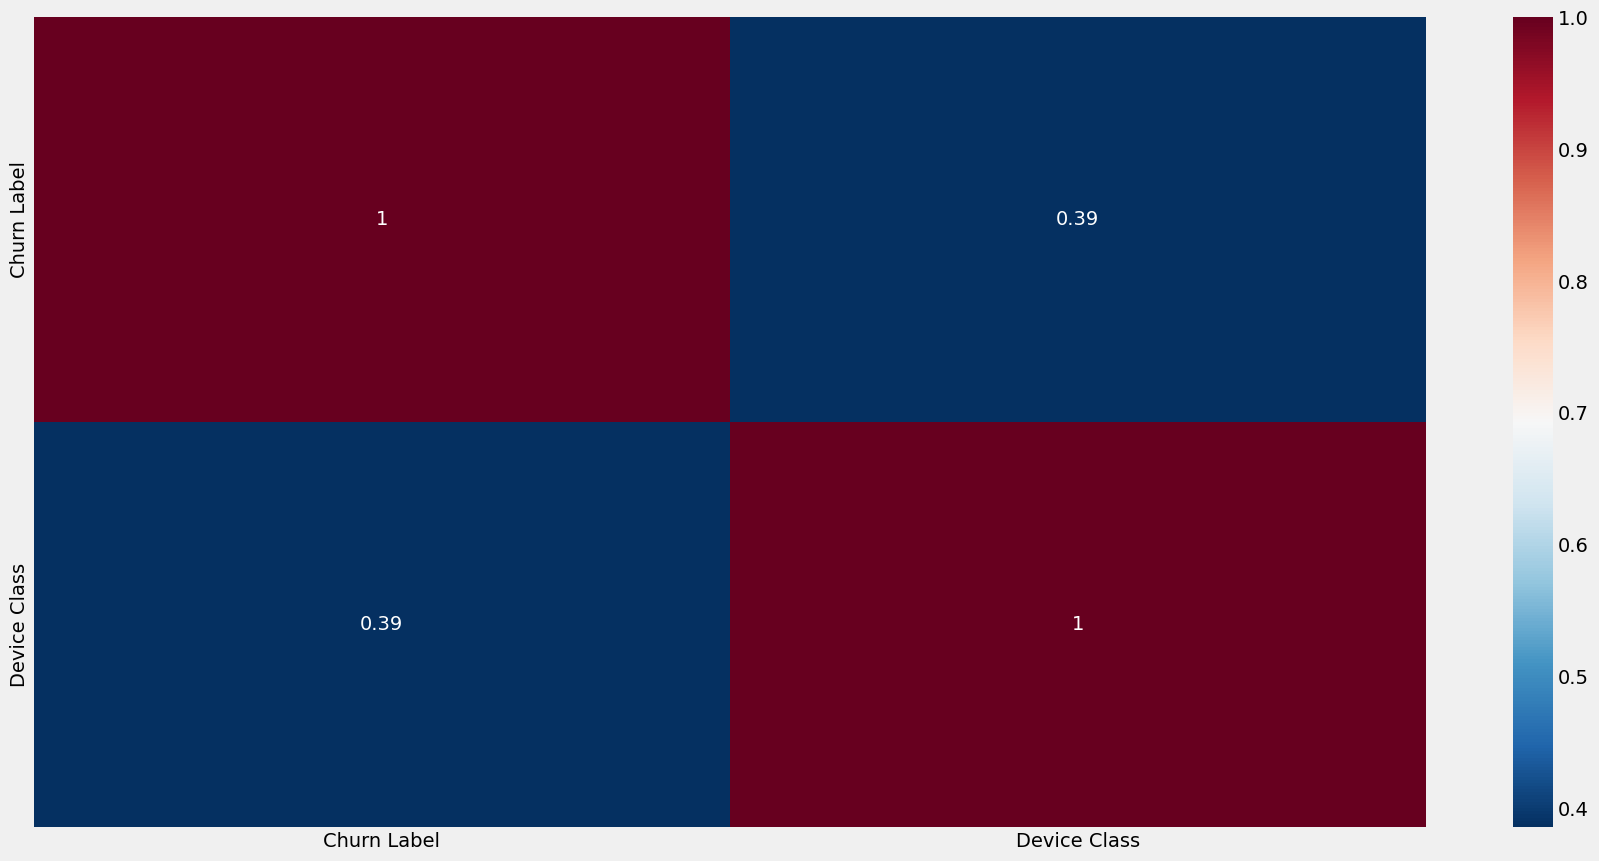

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(final_data_bandung_cluster_3[["Churn Label","Device Class"]].corr(),annot=True,ax=ax,cmap="RdBu_r")
plt.show()

<ipython-input-93-67ece5bb3c54>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



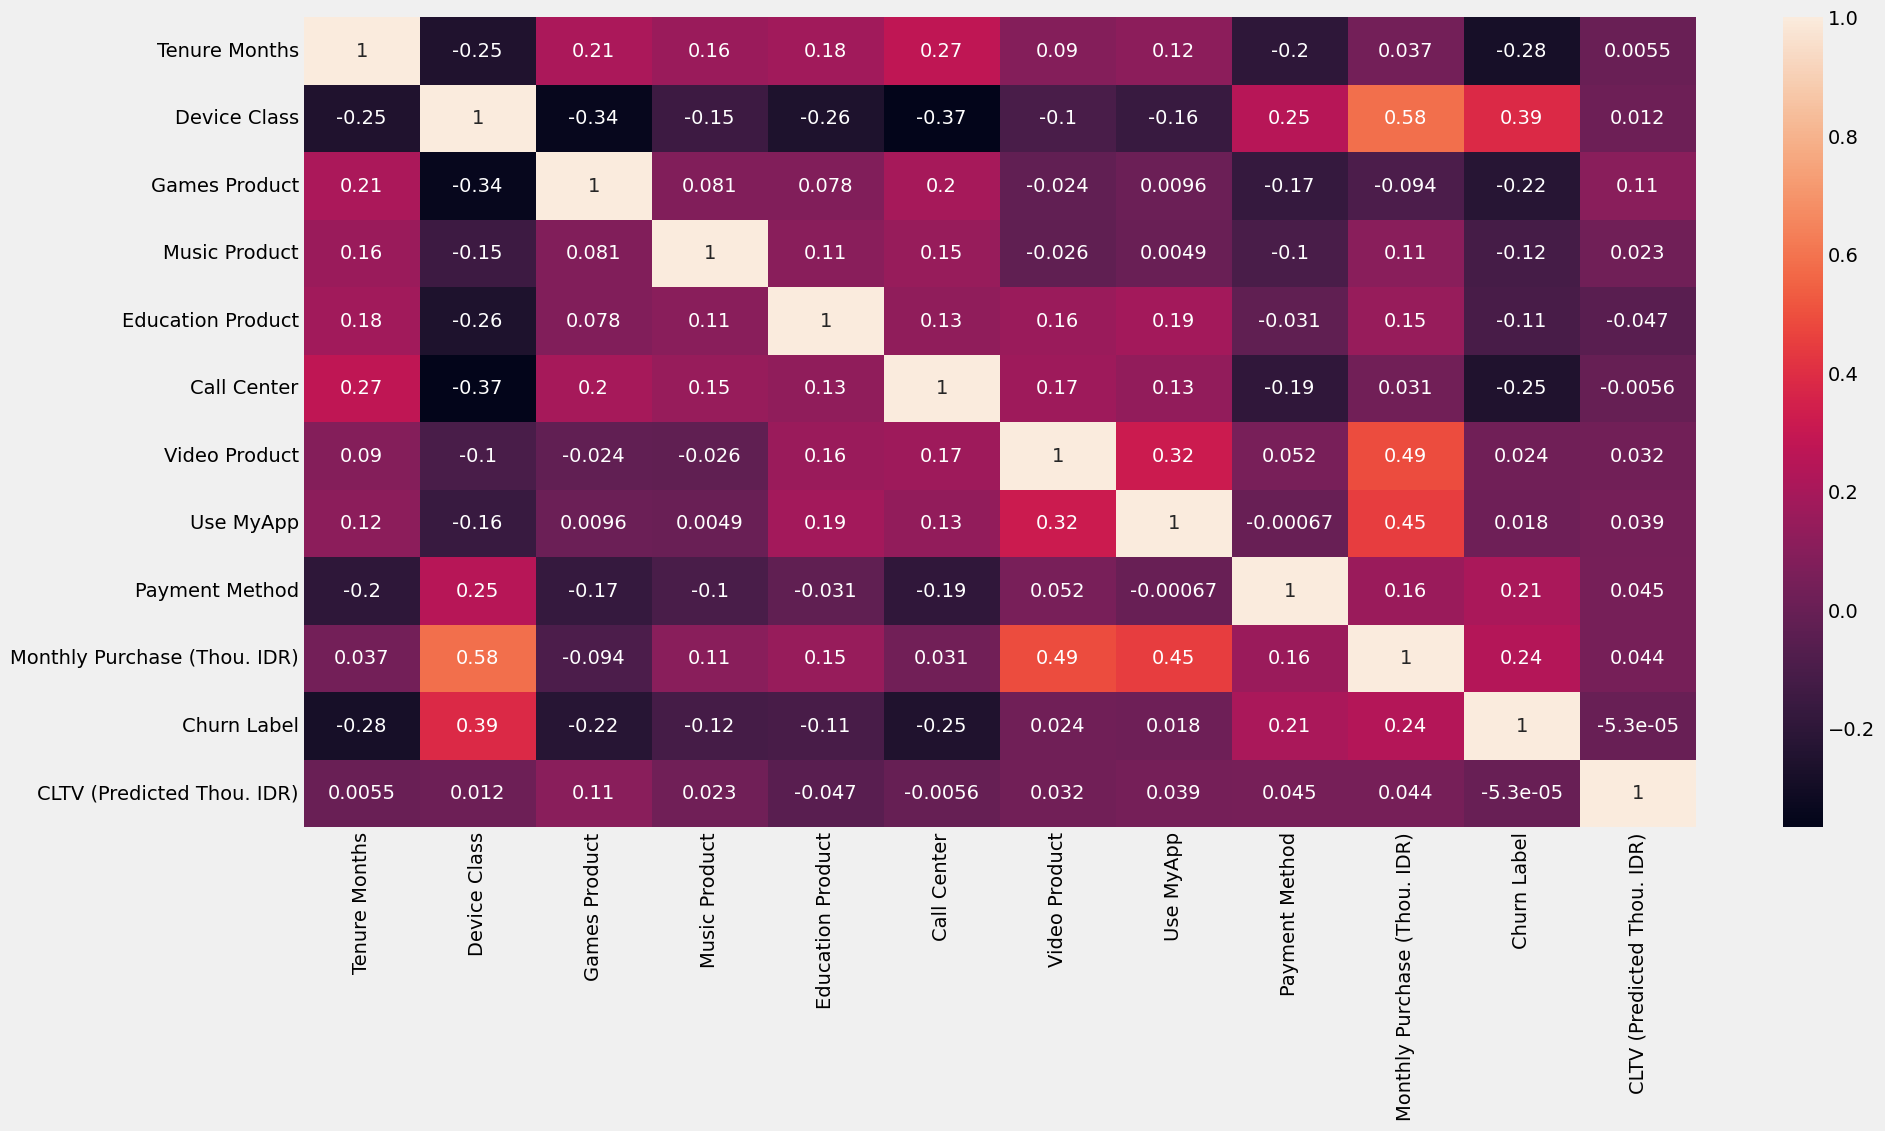

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(final_data_bandung_cluster_3.corr(),annot=True,ax=ax)
plt.show()

## 5. Jenis perangkat apa yang banyak digunakan oleh segmentasi customer pada kurun waktu kuarter ketiga tersebut?

In [ ]:
final_data_bandung_cluster_3_yes_churn = final_data_bandung[(final_data_bandung["cluster"]=="Short-term Customers with High Consumption Levels") &
                                                            (final_data_bandung["Churn Label"]=="Yes")]

In [ ]:
final_data_bandung_cluster_3_yes_churn["Device Class"].value_counts()

High End    299
Mid End      21
Name: Device Class, dtype: int64

In [ ]:
fig = px.bar(x=final_data_bandung_cluster_3_yes_churn["Device Class"].value_counts().index,
             y=final_data_bandung_cluster_3_yes_churn["Device Class"].value_counts(normalize=True).mul(100).round(1).values,
             color=final_data_bandung_cluster_3_yes_churn["Device Class"].value_counts().values,
             text=final_data_bandung_cluster_3_yes_churn["Device Class"].value_counts(normalize=True).mul(100).round(1).values,
             labels={
                "y":"Percentage of Users (%)",
                "x":"Device Type"
             },
             title="Graph of Device User Numbers for Short-term Customers with High Consumption Levels in the City of Bandung During the Third Quarter")
fig.update_traces(textposition='outside',marker_color=["#b2172c","#b3b3b3"])
fig.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/numeric.py:2463: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



## 6. Produk apa yang sering digunakan oleh jenis perangkat di segmentasi customer pada kurun waktu kuarter ketiga tersebut sehingga dapat dijadikan media untuk promosi kedepannya?

In [ ]:
final_data_bandung_cluster_3_yes_churn_dev = final_data_bandung_cluster_3_yes_churn[final_data_bandung_cluster_3_yes_churn["Device Class"]=="High End"]
final_data_bandung_cluster_3_yes_churn_dev

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),cluster
37,37,20,Bandung,High End,Yes,No,No,No,No,No,Pulsa,107.120,Yes,107.60981,-6.914744,7434.7,Short-term Customers with High Consumption Levels
38,38,4,Bandung,High End,No,No,No,No,No,No,Debit,92.170,Yes,107.60981,-6.914744,5573.1,Short-term Customers with High Consumption Levels
40,40,2,Bandung,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,135.720,Yes,107.60981,-6.914744,6097.0,Short-term Customers with High Consumption Levels
42,42,15,Bandung,High End,No,No,No,No,No,No,Digital Wallet,96.785,Yes,107.60981,-6.914744,7432.1,Short-term Customers with High Consumption Levels
43,43,7,Bandung,High End,Yes,No,No,No,No,No,Debit,99.385,Yes,107.60981,-6.914744,5744.7,Short-term Customers with High Consumption Levels
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,1822,6,Bandung,High End,No,No,No,No,Yes,Yes,Pulsa,116.350,Yes,107.60981,-6.914744,3767.4,Short-term Customers with High Consumption Levels
1824,1824,12,Bandung,High End,No,No,No,No,No,No,Credit,95.875,Yes,107.60981,-6.914744,2613.0,Short-term Customers with High Consumption Levels
1825,1825,8,Bandung,High End,No,No,Yes,No,Yes,Yes,Pulsa,131.755,Yes,107.60981,-6.914744,7209.8,Short-term Customers with High Consumption Levels
1827,1827,3,Bandung,High End,No,Yes,Yes,No,Yes,Yes,Pulsa,137.670,Yes,107.60981,-6.914744,3529.5,Short-term Customers with High Consumption Levels


In [ ]:
kategori = final_data_bandung_cluster_3_yes_churn_dev.columns[4:9]
jumlah_pengguna = []
for i in kategori:
  jumlah_pengguna.append(final_data_bandung_cluster_3_yes_churn_dev[i].value_counts().values[1])

In [ ]:
data_produk = pandas.DataFrame()
data_produk["Produk"]=kategori
data_produk["Jumlah Pengguna"]=jumlah_pengguna
data_produk = data_produk.sort_values(by="Jumlah Pengguna",ascending=False)
data_produk

,Produk,Jumlah Pengguna
4,Video Product,133
1,Music Product,75
2,Education Product,73
0,Games Product,41
3,Call Center,39


In [ ]:
fig = px.bar(data_produk.head(3),
             x=data_produk["Produk"].head(3),
             y=data_produk["Jumlah Pengguna"].head(3),
             color=data_produk["Jumlah Pengguna"].head(3),
             labels={
                "x":"Product",
                "y":"Number of Users (People)"
             },
             title="Graph of the Top 3 Most Used Products by Short-term Customers with Low Consumption Levels in the City of Bandung During the Third Quarter")
fig.update_traces(marker_color=["#b2172c","#bc716c","#b3b3b3"])
fig.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/numeric.py:2463: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



# Kesimpulan
Dapat dilakukan promosi melalui education product, music product, dan video product pada segmentasi customer tersebut.